In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import BSpline
import pandas as pd



In [3]:
data = pd.read_csv('track-game.csv', decimal='.', error_bad_lines=False, delimiter=';')
data.describe()
data.head()

,ppe
0,0.491838
1,0.062202
2,0.051687
3,0.060627
4,0.373547


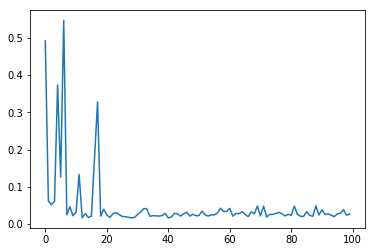

In [4]:
plt.plot(data[0:100], '-')

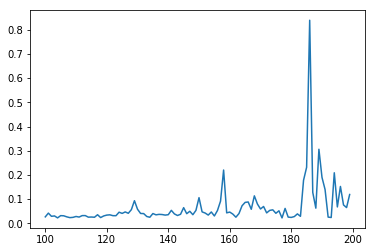

In [5]:
plt.plot(data[100:200], '-')

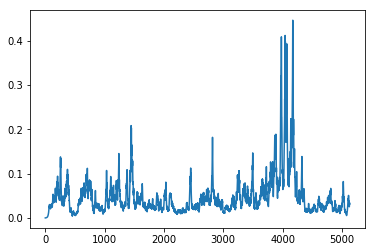

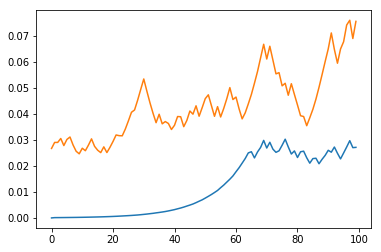

In [6]:
smoothed = [0]

ppe = data['ppe'].values.tolist()


def generateMaxIncrement(positive):
    increment = 0.09 + np.random.uniform(-0.01, 0.01)
    
    return increment if positive else increment * -1
    

def smooth(last, next):
    
    if last == 0:
        last = 0.0001
    
    increment = (next - last) / last
    
    if abs(increment) > 0.1:
        increment = generateMaxIncrement(increment > 0)
        #print("increment {0}".format(increment))
        
    new_val = last + last * increment
    
    return (increment, new_val)


for index, val in enumerate(ppe):
    if index > 0:
        #print(str(ppe[index-1]) + "   --   " + str(val))
        #print(str(smoothed[-1]) + "   --   " + str(val))
        increment, new_val = smooth(smoothed[-1], val)
        #print(new_val)
        smoothed.append(new_val)


plt.plot(smoothed, '-')
plt.show()

plt.plot(smoothed[0:100], '-')
plt.plot(smoothed[100:200], '-')

plt.show()

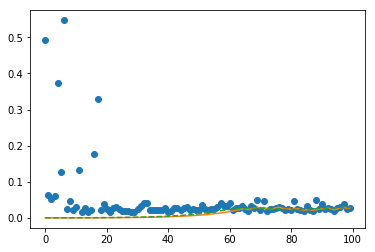

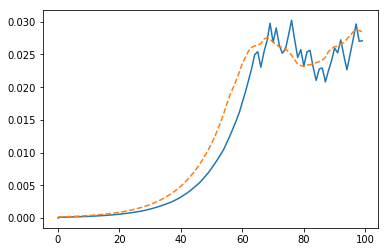

In [7]:
default_window_size = 10

smoothed_averaged_2 = np.convolve(smoothed, np.ones((2,))/2, mode='valid')
smoothed_averaged_5 = np.convolve(smoothed, np.ones((5,))/5, mode='valid')
smoothed_averaged_10 = np.convolve(smoothed, np.ones((default_window_size,))/default_window_size, mode='valid')
smoothed_averaged_15 = np.convolve(smoothed, np.ones((15,))/15, mode='valid')
smoothed_averaged_20 = np.convolve(smoothed, np.ones((20,))/20, mode='valid')
smoothed_averaged_30 = np.convolve(smoothed, np.ones((30,))/30, mode='valid')

plt.plot(ppe[0:100], 'o')
plt.plot(smoothed[0:100], '-')
plt.plot(smoothed_averaged_10[0:100], '--')
plt.show()


plt.plot(smoothed[0:100], '-')
plt.plot(smoothed_averaged_10[0:100], '--')
plt.show()


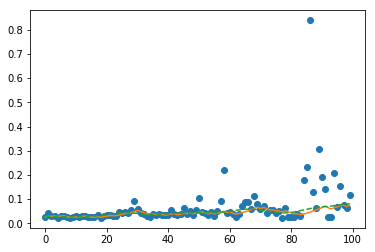

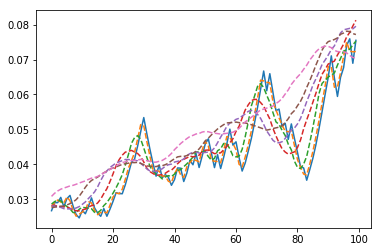

In [8]:

plt.plot(ppe[100:200], 'o')
plt.plot(smoothed[100:200], '-')
plt.plot(smoothed_averaged_10[100:200], '--')
plt.show()


plt.plot(smoothed[100:200], '-')
plt.plot(smoothed_averaged_2[100:200], '--')
plt.plot(smoothed_averaged_5[100:200], '--')
plt.plot(smoothed_averaged_10[100:200], '--')
plt.plot(smoothed_averaged_15[100:200], '--')
plt.plot(smoothed_averaged_20[100:200], '--')
plt.plot(smoothed_averaged_30[100:200], '--')
plt.show()


In [10]:
import csv

with open('smoothed.csv', 'w', newline='\n') as myfile:
     wr = csv.writer(myfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
     for r in smoothed:
        wr.writerow([r])

with open('smoothed-averaged-2.csv', 'w', newline='\n') as myfile:
     wr = csv.writer(myfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
     for r in smoothed_averaged_2:
        wr.writerow([r])


with open('smoothed-averaged-5.csv', 'w', newline='\n') as myfile:
     wr = csv.writer(myfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
     for r in smoothed_averaged_5:
        wr.writerow([r])

    
with open('smoothed-averaged-10.csv', 'w', newline='\n') as myfile:
     wr = csv.writer(myfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
     for r in smoothed_averaged_10:
        wr.writerow([r])
        
with open('smoothed-averaged-15.csv', 'w', newline='\n') as myfile:
     wr = csv.writer(myfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
     for r in smoothed_averaged_15:
        wr.writerow([r])
        
with open('smoothed-averaged-20.csv', 'w', newline='\n') as myfile:
     wr = csv.writer(myfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
     for r in smoothed_averaged_20:
        wr.writerow([r])
        
        
with open('smoothed-averaged-30.csv', 'w', newline='\n') as myfile:
     wr = csv.writer(myfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
     for r in smoothed_averaged_30:
        wr.writerow([r])        